In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split


# Load the dataset
file_path = '/content/drive/MyDrive/Friday-WorkingHours-Morning.pcap_ISCX.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column names
print(data.head())
print(data.columns)
print(len(data.columns))


    Destination Port   Flow Duration   Total Fwd Packets  \
0               3268       112740690                  32   
1                389       112740560                  32   
2                  0       113757377                 545   
3               5355          100126                  22   
4                  0           54760                   4   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       16                         6448   
1                       16                         6448   
2                        0                            0   
3                        0                          616   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          1152                     403   
1                          5056                     403   
2                             0                       0   
3                             0                 

In [2]:

data.columns = data.columns.str.replace(' ', '')

print(data.columns)


Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191033 entries, 0 to 191032
Data columns (total 79 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DestinationPort          191033 non-null  int64  
 1   FlowDuration             191033 non-null  int64  
 2   TotalFwdPackets          191033 non-null  int64  
 3   TotalBackwardPackets     191033 non-null  int64  
 4   TotalLengthofFwdPackets  191033 non-null  int64  
 5   TotalLengthofBwdPackets  191033 non-null  int64  
 6   FwdPacketLengthMax       191033 non-null  int64  
 7   FwdPacketLengthMin       191033 non-null  int64  
 8   FwdPacketLengthMean      191033 non-null  float64
 9   FwdPacketLengthStd       191033 non-null  float64
 10  BwdPacketLengthMax       191033 non-null  int64  
 11  BwdPacketLengthMin       191033 non-null  int64  
 12  BwdPacketLengthMean      191033 non-null  float64
 13  BwdPacketLengthStd       191033 non-null  float64
 14  Flow

In [4]:
data.Label.nunique()


2

In [5]:
data.Label.value_counts()

BENIGN    189067
Bot         1966
Name: Label, dtype: int64

In [6]:


# Separate features and labels
features = data.drop('Label', axis=1)
labels = data['Label']

In [7]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.dropna(inplace=True)

In [8]:
features = features.select_dtypes(include=[float, int])


In [9]:
len(features)

190911

In [10]:
features

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


In [11]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

In [13]:
round(data.shape[0]*80/100)

152826

In [14]:
missing_labels = np.isnan(y_encoded).sum()
print(f"Number of missing values in y_encoded: {missing_labels}")

Number of missing values in y_encoded: 0


In [15]:
train_size = round(len(y_encoded) * 0.8)

X_train = features_scaled[:train_size]
X_test = features_scaled[train_size:]
y_train = y_encoded[:train_size]
y_test = y_encoded[train_size:]

print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

print(f"Final Length of X_test: {len(X_test)}")
print(f"Final Length of y_test: {len(y_test)}")



Length of X_train: 152826
Length of y_train: 152826
Length of X_test: 38085
Length of y_test: 38207
Final Length of X_test: 38085
Final Length of y_test: 38085


In [33]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='auto')
ocsvm.fit(X_train)

y_pred = ocsvm.predict(X_test)



print("Number of anomalies detected:", (y_pred == -1).sum())




Number of anomalies detected: 454


In [ ]:
from sklearn.metrics import accuracy_score

# Convert One-Class SVM predictions to 0 and 1: -1 for outliers and 1 for inliers
svm_predict = np.where(y_pred == -1, 1, 0)

# Convert true labels to 0 and 1 as well
y_test_mapped = np.where(y_test == 'Bot', 1, 0)

accuracy = accuracy_score(y_test_mapped, svm_predict)
print("Accuracy in separating Outliers:", accuracy)


Accuracy in separating Outliers: 0.965887177213787


In [34]:

y_pred = np.array(y_pred)

# Get unique values and their counts
unique_values, counts = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Value: -1, Count: 454
Value: 1, Count: 37631


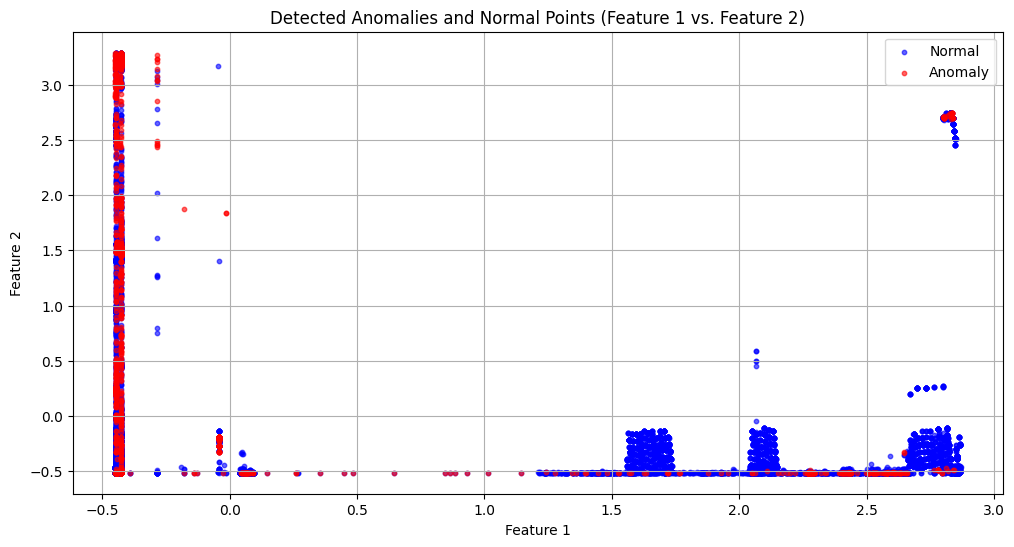

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))

plt.scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], c='blue', label='Normal', s=10, alpha=0.6)

plt.scatter(X_test[:, 0][y_pred == -1], X_test[:, 1][y_pred == -1], c='red', label='Anomaly', s=10, alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Detected Anomalies and Normal Points')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

y_pred = iso_forest.predict(X_test)

print("Number of anomalies detected:", (y_pred == -1).sum())

iso_forest_predict = np.where(y_pred == -1, 1, 0)

accuracy = accuracy_score(y_test, iso_forest_predict)
print("Accuracy in separating Outliers:", accuracy)

unique_values, counts = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Number of anomalies detected: 378
Accuracy in separating Outliers: 0.9807273204673757
Value: -1, Count: 378
Value: 1, Count: 37707
